<a href="https://colab.research.google.com/github/DuarteMagano/AcademiaDeFisica/blob/main/grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover

In [ ]:
%%capture
%pip install qiskit==2.1.2 pylatexenc
%pip install qiskit-ibm-rutime
%pip install qiskit[visualization]

In [ ]:
# imports

from qiskit import QuantumCircuit
from qiskit.circuit.library import MCMTGate, ZGate

from qiskit.primitives import StatevectorSampler

import numpy as np

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [ ]:
def grover_oracle():
  """
    Mark state 11111
  """
  qc = QuantumCircuit(5)
  qc.compose(MCMTGate(ZGate(), 4, 1), inplace=True)
  return qc

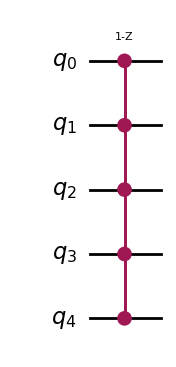

In [ ]:
qc_oracle = grover_oracle()
qc_oracle.draw(output="mpl")

In [ ]:
def mirror():
  """
    Mark state |psi> = 1/sqrt(2^5) sum_{x=0}^{2^5-1} |x>
  """
  qc = QuantumCircuit(5)
  qc.h(range(5))
  qc.x(range(5))
  qc.compose(MCMTGate(ZGate(), 4, 1), inplace=True)
  qc.x(range(5))
  qc.h(range(5))
  return qc

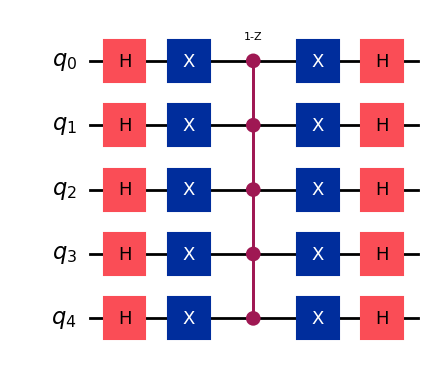

In [ ]:
qc_mirror = mirror()
qc_mirror.draw(output="mpl")

In [ ]:
def grover_algorithm(num_iterations):
  qc = QuantumCircuit(5)
  qc.h(range(5))
  for i in range(num_iterations):
    qc.compose(grover_oracle(), inplace=True)
    qc.compose(mirror(), inplace=True)
  qc.measure_all()
  return qc

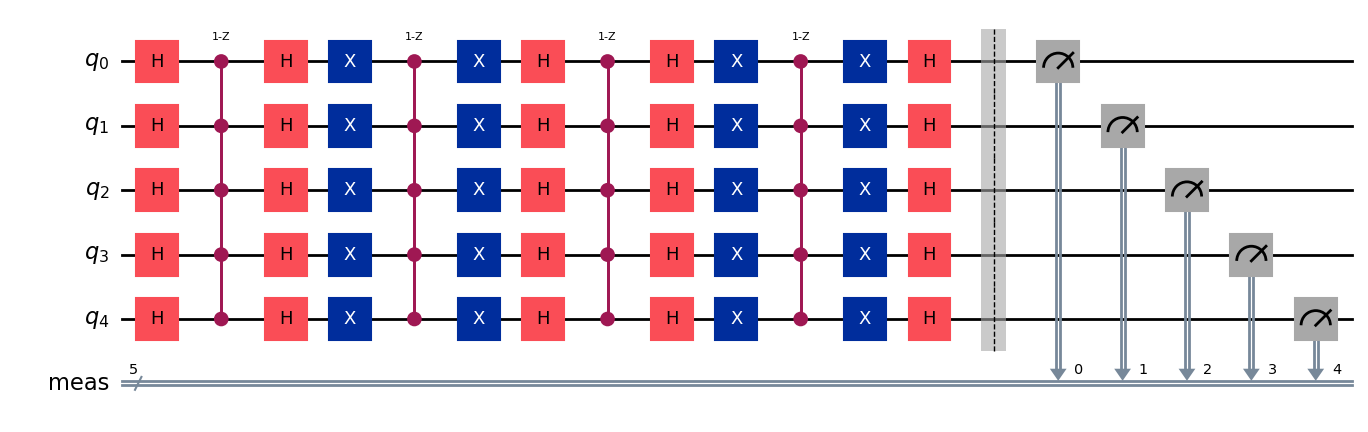

In [ ]:
qc_algo = grover_algorithm(2)
qc_algo.draw(output="mpl")

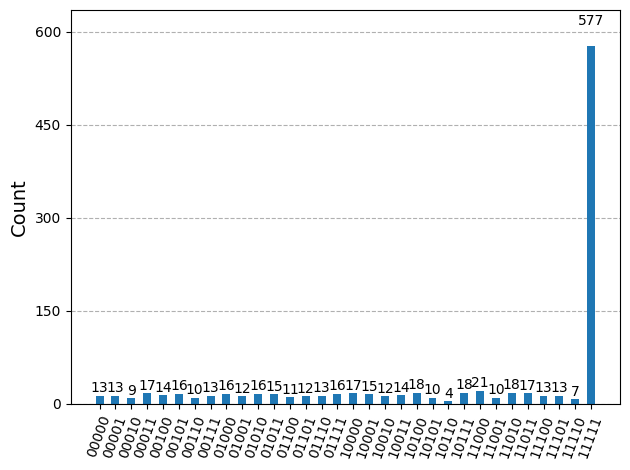

In [ ]:
result = StatevectorSampler().run([qc_algo], shots=1000).result()[0].data.meas.get_counts()
plot_histogram(result)

In [ ]:
NSHOTS = 1000
probs = []
for num_iterations in range(2^5):
  qc_algo = grover_algorithm(num_iterations)
  result = StatevectorSampler().run([qc_algo], shots=NSHOTS).result()[0].data.meas.get_counts()
  prob = result.get("11111", 0) / NSHOTS
  probs.append(prob)

In [ ]:
theta0 = np.arcsin(1 / np.sqrt(2**5))
probs_theory = [np.sin((2*k + 1) * theta0)**2 for k in range(2^5)]

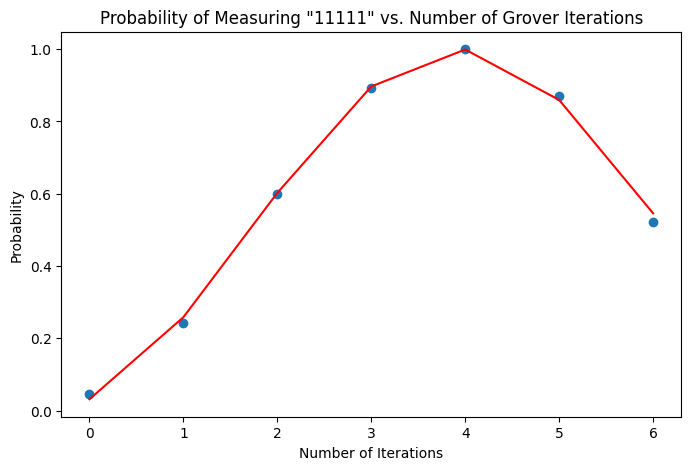

In [ ]:
x_values = range(len(probs))
y_values = probs

plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values)
plt.plot(x_values, probs_theory, color='red')
plt.title('Probability of Measuring "11111" vs. Number of Grover Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Probability')
plt.show()